# Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import missingno as msno
import lasio
import scipy.stats as stats
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [5]:
las  = lasio.read("Well.las")
df = las.df()
df.reset_index(inplace=True)
df.drop(columns=['LLD','LLS','RDEP','RSHAL'],inplace=True)

In [6]:
df.shape

(24321, 8)

In [7]:
df.describe()

,DEPTH,CALI,DENC,DENS,DTC,GR,NEUT,SP
count,24321.000000,18969.000000,18854.000000,18853.000000,18741.000000,22922.000000,18782.000000,18998.000000
mean,6080.000000,14.021063,0.017240,2.332970,75.176950,60.763843,0.160292,171.872206
std,3510.506142,3.582311,0.032249,0.256994,17.063589,51.753921,0.163090,70.593788
min,0.000000,8.200000,-0.091100,1.332000,47.100000,4.434600,-0.035600,0.010300
25%,3040.000000,10.300000,0.002000,2.065000,64.400000,14.205400,0.038850,187.783000
50%,6080.000000,14.077600,0.011000,2.416800,68.749000,29.939050,0.091600,203.533000
75%,9120.000000,17.446000,0.023000,2.581300,79.576900,109.840400,0.295100,214.126175
max,12160.000000,22.645500,0.353100,2.750700,193.522200,192.622000,0.595600,235.398100


# Data Preprocessing

DTC      5580
NEUT     5539
DENS     5468
DENC     5467
CALI     5352
SP       5323
GR       1399
DEPTH       0
dtype: int64

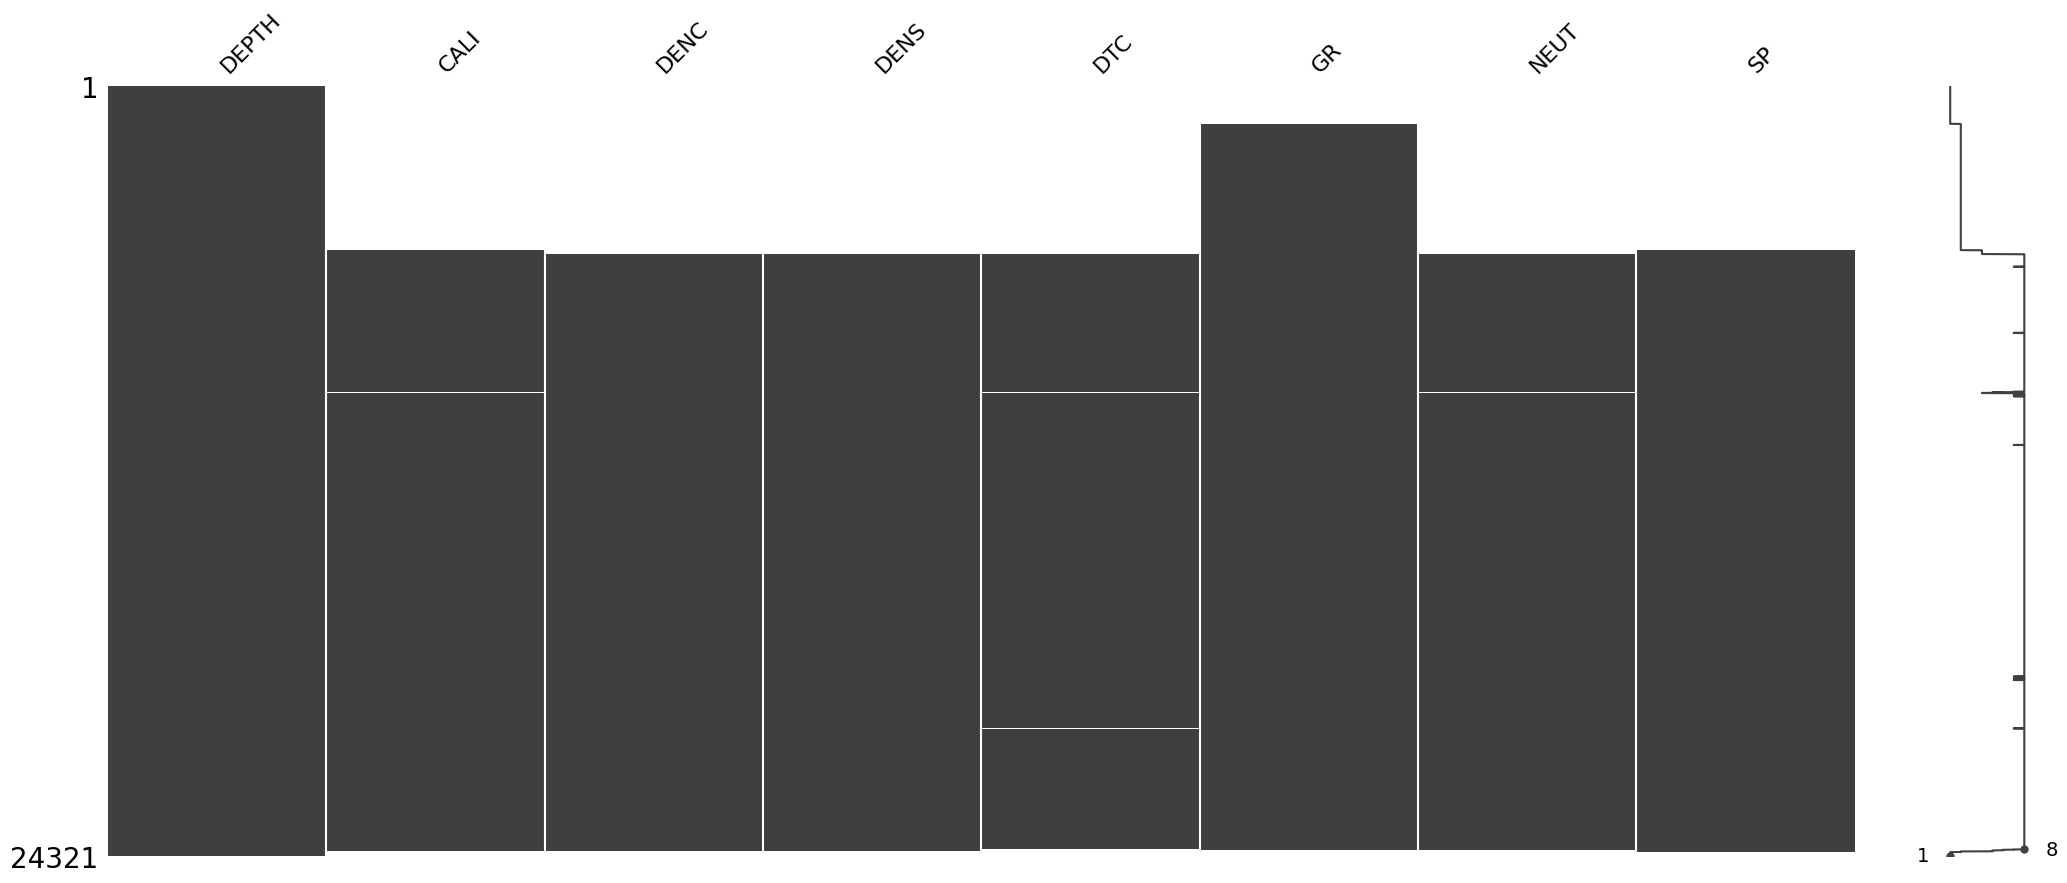

In [8]:
msno.matrix(df)
df.isnull().sum().sort_values(ascending=False)

In [9]:
df.dropna(inplace=True)

DEPTH    0
CALI     0
DENC     0
DENS     0
DTC      0
GR       0
NEUT     0
SP       0
dtype: int64

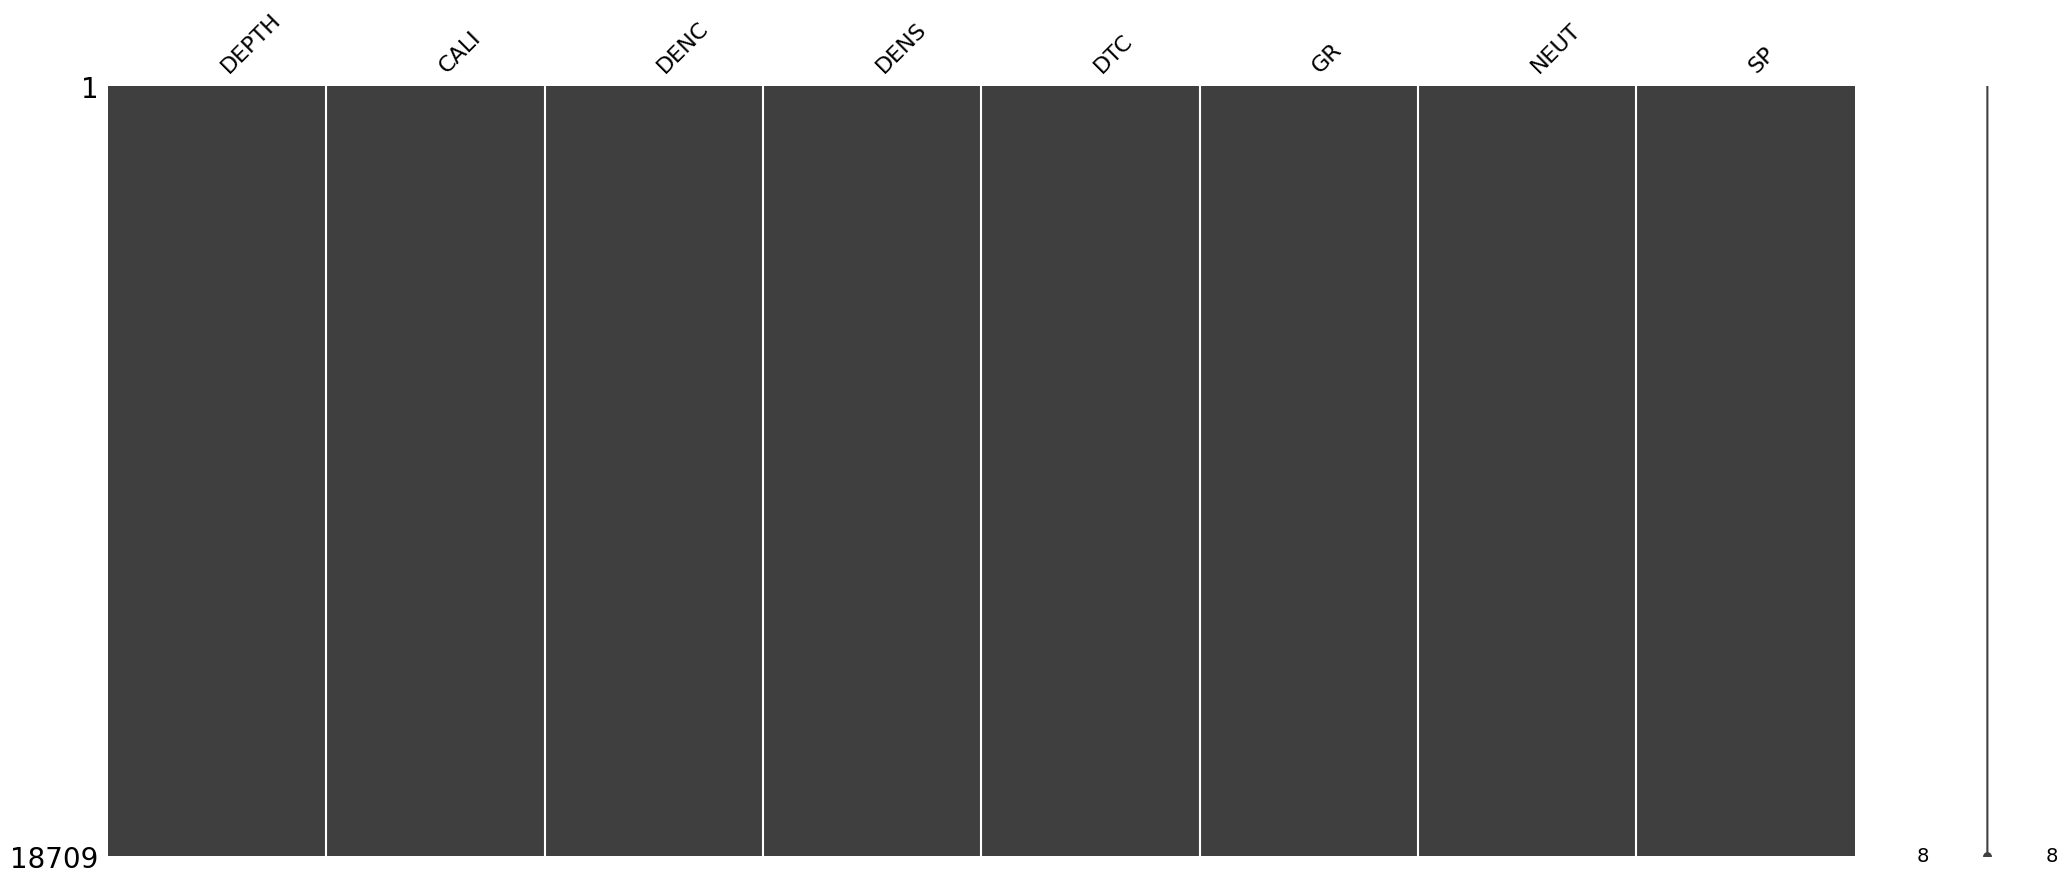

In [10]:
msno.matrix(df)
df.isnull().sum().sort_values(ascending=False)

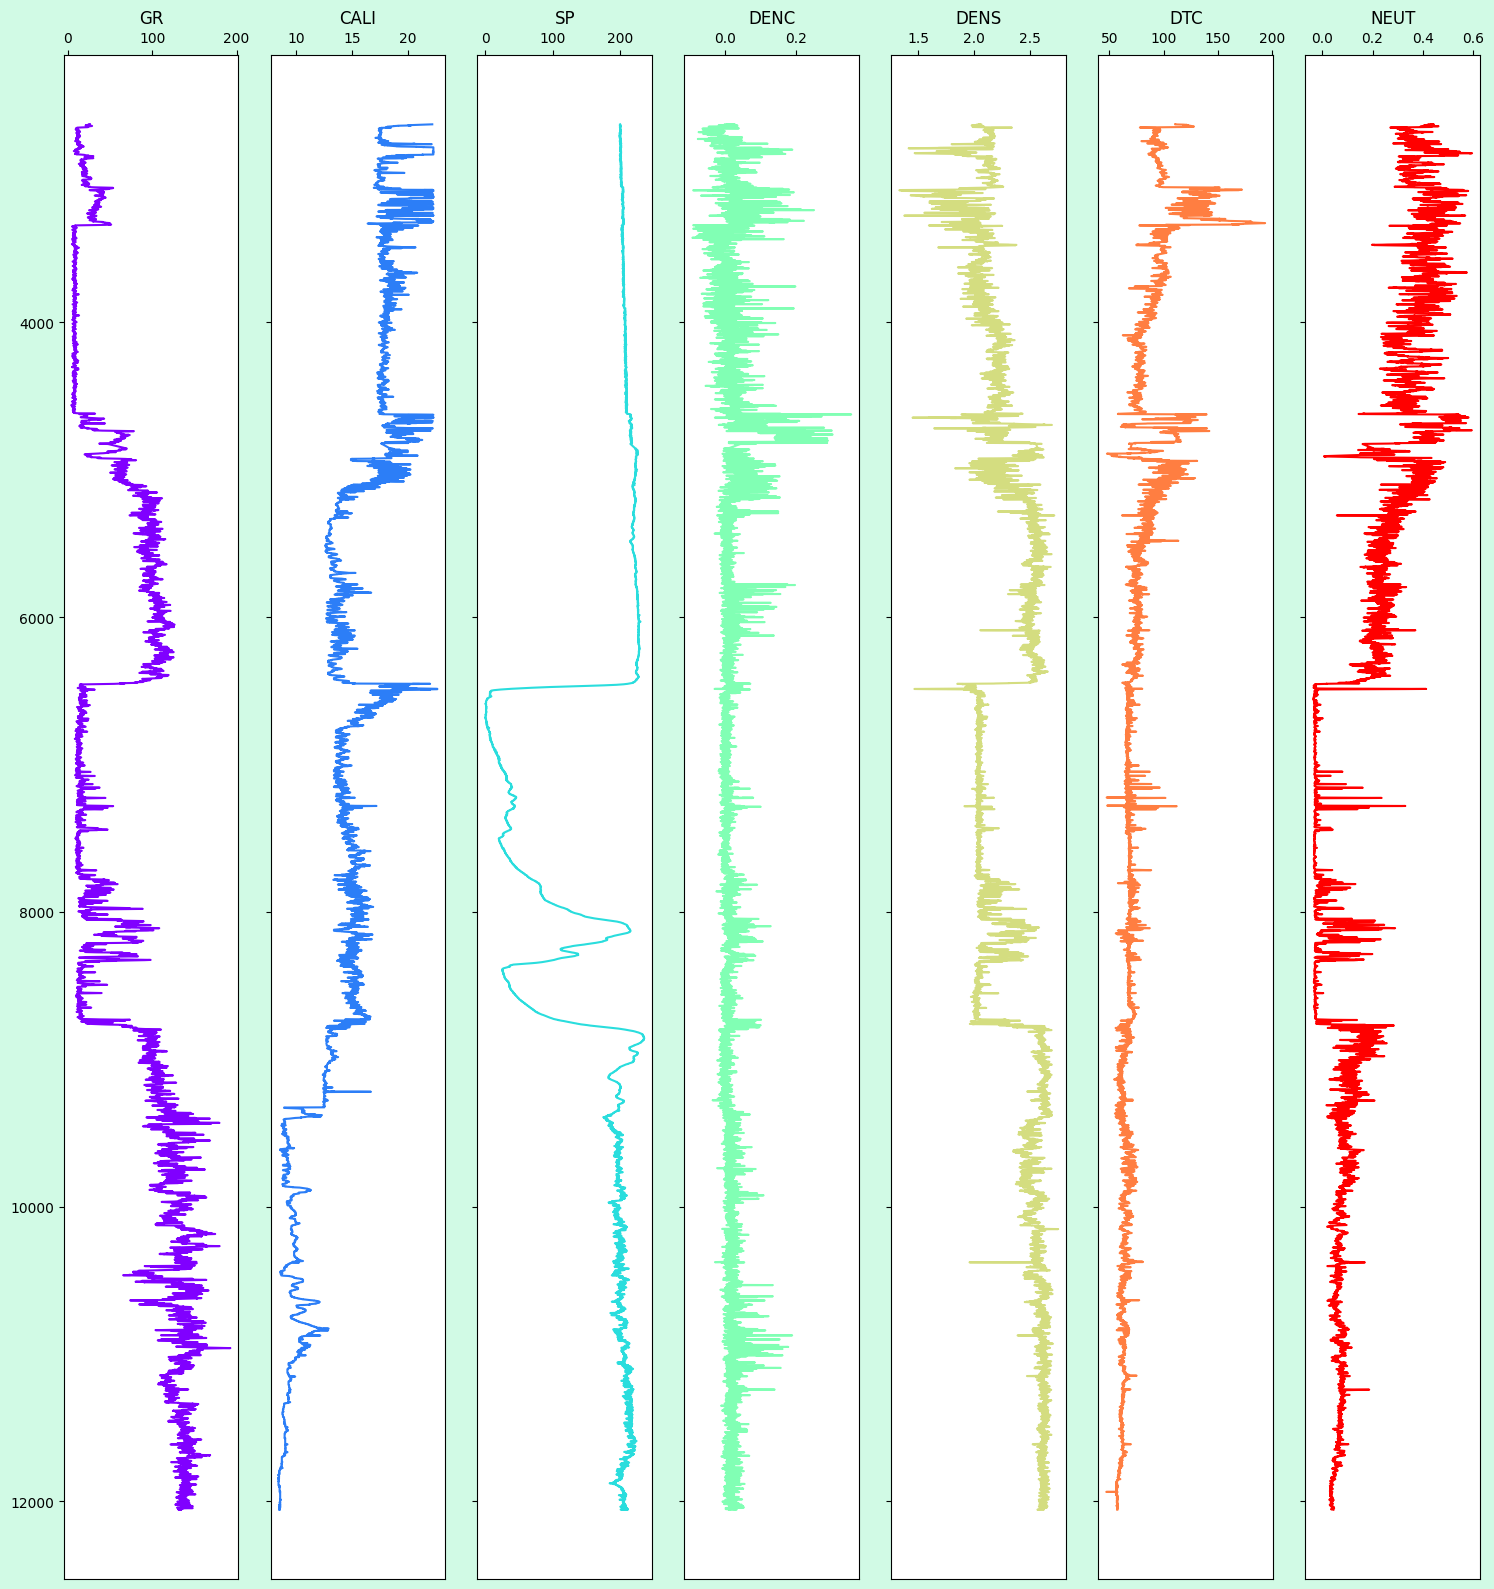

In [14]:
A = df
plotting = ['GR', 'CALI', 'SP','DENC','DENS','DTC','NEUT']
fig, ax = plt.subplots(nrows=1, ncols=len(plotting), figsize=(15,16), sharey=True)
fig.patch.set_facecolor("#D1FAE5")

colors = cm.rainbow(np.linspace(0, 1, len(plotting)))

for j, (i, color) in enumerate(zip(plotting, colors)):
    ax[j].invert_yaxis()
    if i == 'LLD' or i == 'LLS' or i=='RDEP' or i=='RSHAL':
        ax[j].set_xscale('log')
        ax[j].plot(A[i], A["DEPTH"], color=color,lw=1.5)
        ax[j].set_title(i)
        ax[j].xaxis.set_ticks_position("top")
        ax[j].xaxis.set_label_position("top")

    else:
        ax[j].plot(A[i], A["DEPTH"], color=color,lw=1.5)
        ax[j].set_title(i)
        ax[j].xaxis.set_ticks_position("top")
        ax[j].xaxis.set_label_position("top")
        

plt.tight_layout()
plt.show()

# Saving Processed Data File

In [9]:
#df.to_csv(r"D:\Python work\Machine Learning\Projects\Porosity Prediction Using ANN\proc_logs.csv",index=False)

# Feature Selection

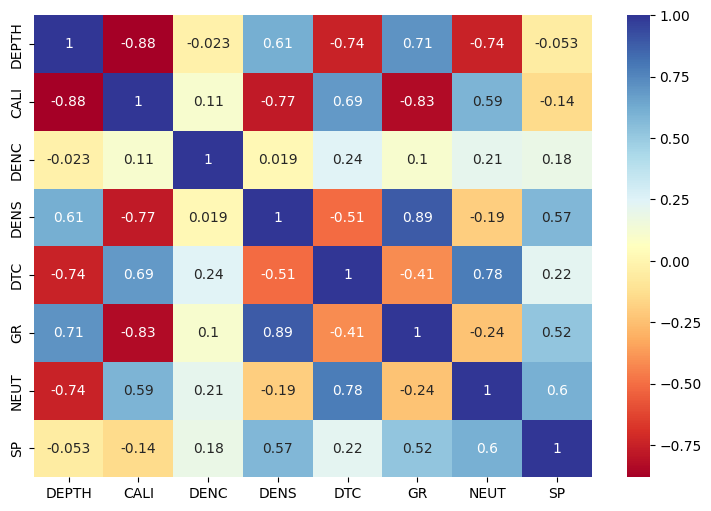

In [15]:
plt.subplots(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

In [16]:
df

,DEPTH,CALI,DENC,DENS,DTC,GR,NEUT,SP
5314,2657.0,22.1927,-0.0001,2.0430,110.5102,26.3046,0.4334,199.6736
5315,2657.5,22.0428,0.0108,2.0640,110.5019,25.9751,0.4419,199.7091
5316,2658.0,21.9929,0.0281,2.0660,112.1471,24.8744,0.4438,199.8167
5317,2658.5,21.6931,0.0108,2.0660,114.9905,24.5572,0.4444,199.9610
5318,2659.0,21.4932,0.0043,2.0640,117.9108,24.4639,0.4216,200.0456
...,...,...,...,...,...,...,...,...
24108,12054.0,8.4500,0.0330,2.6246,57.1000,131.6180,0.0398,201.4330
24109,12054.5,8.4500,0.0220,2.6118,57.2000,131.0120,0.0412,200.3830
24110,12055.0,8.5000,0.0130,2.5842,57.2000,133.9410,0.0428,201.4330
24111,12055.5,8.5000,0.0100,2.5655,57.1500,134.2440,0.0438,205.6330


In [17]:
X = df[['SP','GR','DTC','DENS','DENC']]
y = df['NEUT']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
(X_train.shape[1],)

(5,)

# ANN Implementation

In [19]:
tf.random.set_seed(3)
model=Sequential([
    Dense(8,activation='relu',input_shape=(X_train.shape[1],)), #HL1
    Dense(4,activation='relu'), #HL2p
    Dense(1, activation='linear') #output layer
])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89 (356.00 B)

 Trainable params: 89 (356.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss = tf.keras.losses.MeanSquaredError()

In [22]:
model.compile(optimizer=opt,loss=loss ,metrics=['r2_score'])

In [23]:
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights =True)

In [24]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_test,y_test),
    epochs=10,
    callbacks=[early_stopping_callback]
)

Epoch 1/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0295 - r2_score: -0.0950 - val_loss: 0.0022 - val_r2_score: 0.9127
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0020 - r2_score: 0.9262 - val_loss: 0.0020 - val_r2_score: 0.9214
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018 - r2_score: 0.9345 - val_loss: 0.0017 - val_r2_score: 0.9332
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016 - r2_score: 0.9417 - val_loss: 0.0015 - val_r2_score: 0.9388
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - r2_score: 0.9459 - val_loss: 0.0014 - val_r2_score: 0.9425
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0014 - r2_score: 0.9497 - val_loss: 0.0015 - val_r2_score: 0.9415
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - r2_score: 0.9515 - val_loss: 0.0015 - val_r2_score: 0.9405
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0013 - r2_score: 0.9525 - val_loss: 0.001

# ANN Evaluation

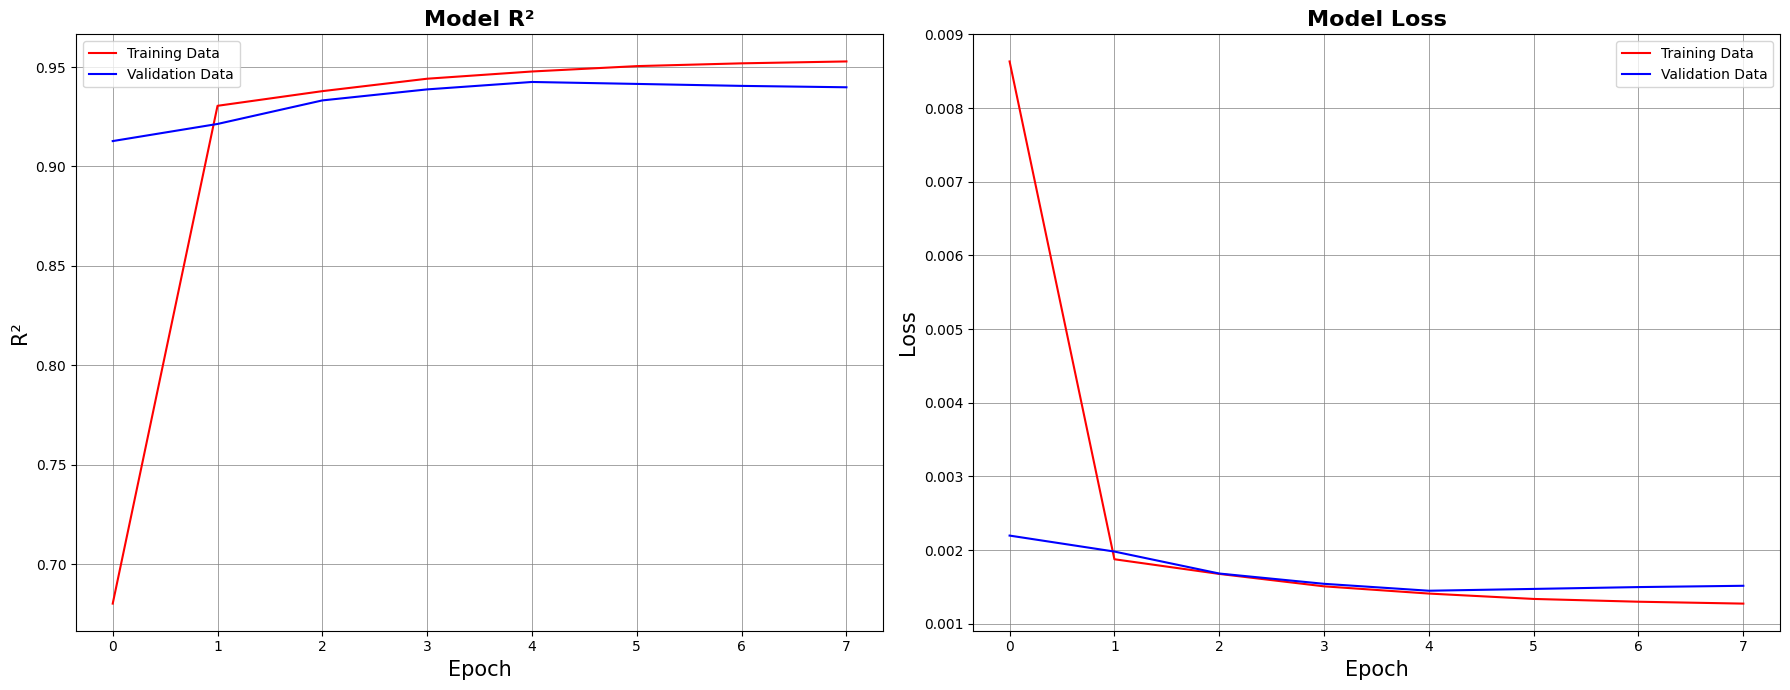

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18, 7))

ax[0].plot(history.history['r2_score'], color='r', label='Training Data')
ax[0].plot(history.history['val_r2_score'], color='b', label='Validation Data')
ax[0].set_xlabel('Epoch', fontsize=15)
ax[0].set_ylabel('R²', fontsize=15)
ax[0].set_title('Model R²', fontsize=16, fontweight='bold')
ax[0].spines['left'].set_color('black')
ax[0].spines['bottom'].set_color('black')
ax[0].tick_params(axis='x', colors='black')
ax[0].tick_params(axis='y', colors='black')
ax[0].grid(which='major', linestyle='-', linewidth=0.5, color='grey')
ax[0].grid(which='minor', linestyle='-', linewidth=0.5, color='black')
ax[0].legend()

ax[1].plot(history.history['loss'], color='r', label='Training Data')
ax[1].plot(history.history['val_loss'], color='b', label='Validation Data')
ax[1].set_xlabel('Epoch', fontsize=15)
ax[1].set_ylabel('Loss', fontsize=15)
ax[1].set_title('Model Loss', fontsize=16, fontweight='bold')
ax[1].spines['left'].set_color('black')
ax[1].spines['bottom'].set_color('black')
ax[1].tick_params(axis='x', colors='black')
ax[1].tick_params(axis='y', colors='black')
ax[1].grid(which='major', linestyle='-', linewidth=0.5, color='grey')
ax[1].grid(which='minor', linestyle='-', linewidth=0.5, color='black')
ax[1].legend()

plt.tight_layout()
plt.show()


In [26]:
loss, R2 = model.evaluate(X_test, y_test)
R2


117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - r2_score: 0.9403


0.9424823522567749

In [27]:
y_pred = model.predict(X_test)
y_pred = y_pred.ravel()

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [28]:
df0 = pd.DataFrame({'predicted': y_pred, 'original': y_test})
df0['residual'] = df0['original'] - df0['predicted']
df0

,predicted,original,residual
19795,0.116103,0.0696,-0.046503
19096,0.056004,0.0684,0.012396
23221,0.122056,0.1002,-0.021856
7400,0.394494,0.4139,0.019406
9441,0.515269,0.4818,-0.033469
...,...,...,...
18879,0.066180,0.0802,0.014020
9976,0.366835,0.3885,0.021665
23017,0.057408,0.0442,-0.013208
12188,0.210453,0.2069,-0.003553


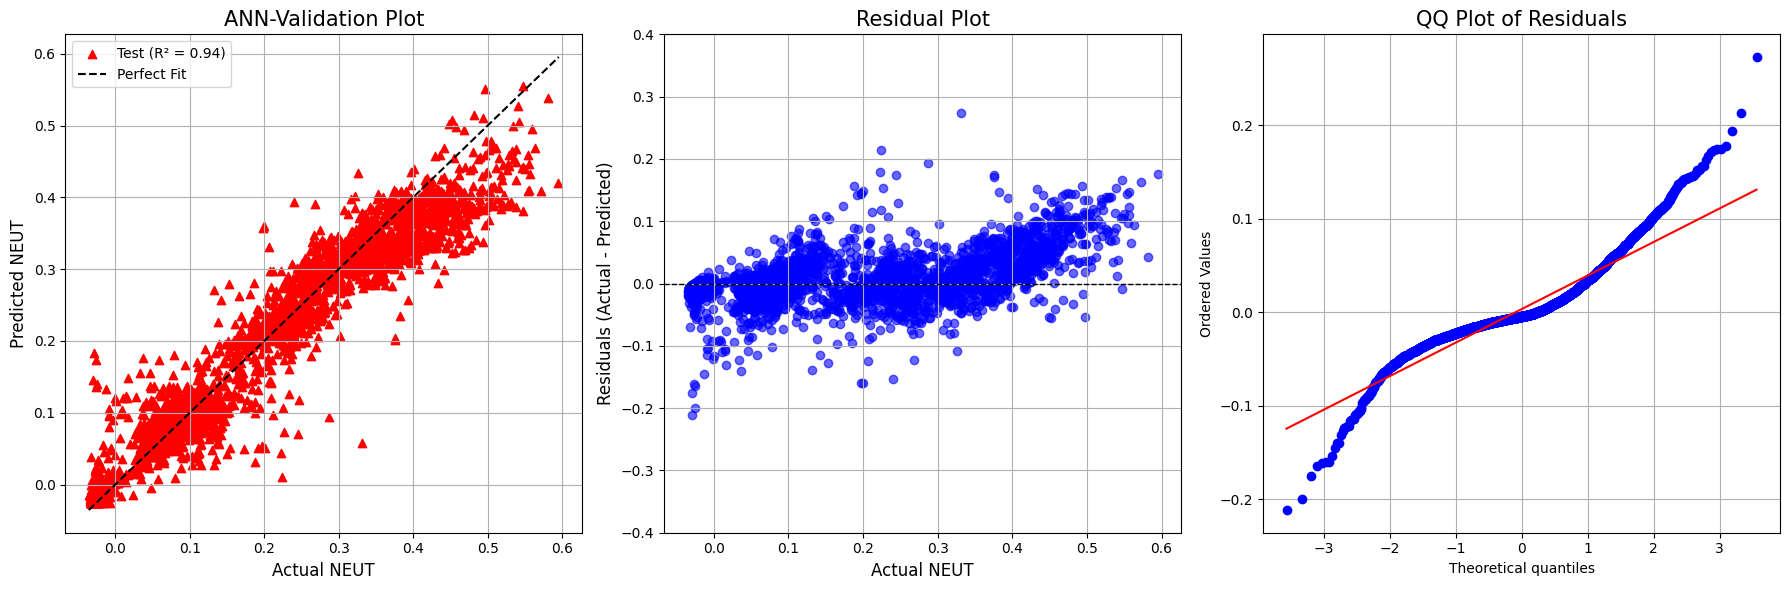

In [29]:
r2_test = r2_score(y_test, y_pred)
residuals = y_test - y_pred

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].scatter(y_test, y_pred, color='red', label=f'Test (R² = {r2_test:.2f})', marker='^')
ax[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'k--', label='Perfect Fit')
ax[0].set_xlabel('Actual NEUT', fontsize=12)
ax[0].set_ylabel('Predicted NEUT', fontsize=12)
ax[0].set_title('ANN-Validation Plot', fontsize=15)
ax[0].legend()
ax[0].grid(True)

ax[1].scatter(y_test, residuals, color='blue', marker='o', alpha=0.6)
ax[1].axhline(0, color='k', linestyle='--', linewidth=1)
ax[1].set_xlabel('Actual NEUT', fontsize=12)
ax[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
ax[1].set_ylim(-0.4, 0.4)
ax[1].set_title('Residual Plot', fontsize=15)
ax[1].grid(True)

stats.probplot(residuals, dist="norm", plot=ax[2])
ax[2].set_title('QQ Plot of Residuals', fontsize=15)
ax[2].grid(True)

plt.tight_layout()
plt.show()


In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmsr = np.sqrt(mse)

results = {
        "R²": r2,
        "MSE": mse,
        "RMSE":rmsr,
        "MAE": mae,
        "MAPE": mape
    }


results_df = pd.DataFrame.from_dict(results, orient='index', columns=["ANN"]).T
print(results_df)

           R²       MSE      RMSE       MAE      MAPE
ANN  0.942482  0.001448  0.038056  0.025306  0.497094


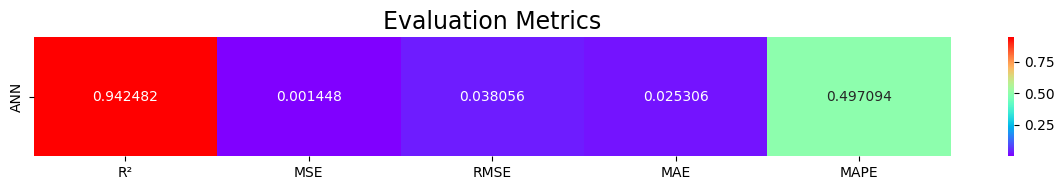

In [31]:
plt.figure(figsize=(12,2))
sns.heatmap(results_df,annot=True, fmt='0.6f',cmap="rainbow")
plt.title("Evaluation Metrics", fontsize=17)

plt.tight_layout()
plt.show()

# Saving Model 

In [ ]:
#with open('Scaler_NEUT.pkl','wb') as file:
    #pickle.dump(scaler,file)

#model.save('NEUT_model.keras')

# Results

In [32]:
y_predicted = model.predict(scaler.transform(X))
df['NEUT_Pred'] = y_predicted

585/585 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [33]:
df

,DEPTH,CALI,DENC,DENS,DTC,GR,NEUT,SP,NEUT_Pred
5314,2657.0,22.1927,-0.0001,2.0430,110.5102,26.3046,0.4334,199.6736,0.335170
5315,2657.5,22.0428,0.0108,2.0640,110.5019,25.9751,0.4419,199.7091,0.335164
5316,2658.0,21.9929,0.0281,2.0660,112.1471,24.8744,0.4438,199.8167,0.341072
5317,2658.5,21.6931,0.0108,2.0660,114.9905,24.5572,0.4444,199.9610,0.343644
5318,2659.0,21.4932,0.0043,2.0640,117.9108,24.4639,0.4216,200.0456,0.345749
...,...,...,...,...,...,...,...,...,...
24108,12054.0,8.4500,0.0330,2.6246,57.1000,131.6180,0.0398,201.4330,0.042435
24109,12054.5,8.4500,0.0220,2.6118,57.2000,131.0120,0.0412,200.3830,0.041836
24110,12055.0,8.5000,0.0130,2.5842,57.2000,133.9410,0.0428,201.4330,0.032496
24111,12055.5,8.5000,0.0100,2.5655,57.1500,134.2440,0.0438,205.6330,0.026314


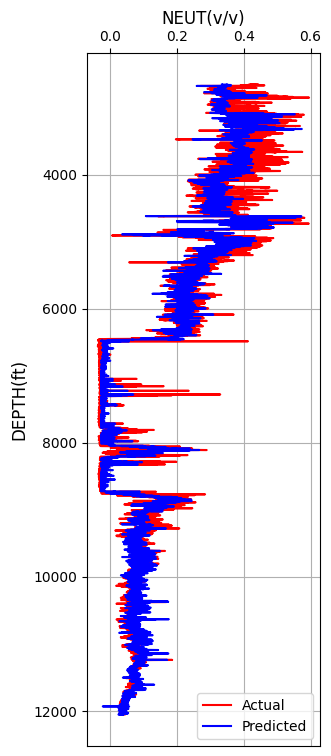

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(3, 9))

ax.plot(df['NEUT'], df['DEPTH'], c = 'r', label='Actual')
ax.plot(df['NEUT_Pred'], df['DEPTH'], c = 'b', label='Predicted')
ax.invert_yaxis()
ax.set_ylabel('DEPTH(ft)', fontsize=12)
ax.set_xlabel('NEUT(v/v)', fontsize=12)
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")
ax.legend()
ax.grid(True)

plt.show()

